---
toc: false
comments: true
layout: post
title: Cats and Dogs (ML)
description: Yay
courses: { compsci: {week: 8} }
type: tangibles
---

### 1. Install Required Libraries And Import

https://chat.openai.com/share/e42d217a-6bc8-4b45-b138-d217427e00ff

In [1]:
pip install tensorflow
pip install tensorflow-datasets

# https://github.com/tensorflow/datasets/issues/5097
# pip install --upgrade --force-reinstall tfds-nightly


SyntaxError: invalid syntax (2504648293.py, line 1)

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

2023-11-01 23:28:19.842245: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-01 23:28:19.921186: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 23:28:20.234220: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 23:28:20.234271: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 23:28:20.236348: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

### 2. Load "cats_vs_dogs" Dataset

In [4]:
# Load the "cats_vs_dogs" dataset
dataset, info = tfds.load("cats_vs_dogs", split="train[:80%]", with_info=True, as_supervised=True)

# Split the dataset into training and testing sets
train_dataset = dataset
test_dataset = tfds.load("cats_vs_dogs", split="train[80%:]", as_supervised=True)

# Preprocess and batch the data
def preprocess_image(image, label):
    image = tf.image.resize(image, (150, 150))
    image = tf.image.per_image_standardization(image)
    return image, label

BATCH_SIZE = 512
train_dataset = train_dataset.map(preprocess_image).batch(BATCH_SIZE)
test_dataset = test_dataset.map(preprocess_image).batch(BATCH_SIZE)

# Initialize empty lists for train and test labels
train_labels = []
test_labels = []

# Iterate through the training dataset and collect labels
for image, label in train_dataset:
    train_labels.extend(label.numpy())

# Iterate through the test dataset and collect labels
for image, label in test_dataset:
    test_labels.extend(label.numpy())

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


### 3. Build the Model
Convolution Neural Network (CNN)

In [6]:
from tensorflow.keras import regularizers
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### 4. Train the Model

In [7]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
 9/37 [======>.......................] - ETA: 2:54 - loss: 0.6900 - accuracy: 0.5215

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


11/37 [=======>......................] - ETA: 2:51 - loss: 0.6874 - accuracy: 0.5330

12/37 [========>.....................] - ETA: 2:45 - loss: 0.6868 - accuracy: 0.5329

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


16/37 [===========>..................] - ETA: 6:11 - loss: 0.6854 - accuracy: 0.5383

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


23/37 [=================>............] - ETA: 3:01 - loss: 0.6801 - accuracy: 0.5583

### 5. Evaluate the Model

In [12]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy}')

146/146 [==============================] - 9s 62ms/step - loss: 1.0149 - accuracy: 0.8052
Test accuracy: 0.805245041847229


### 6. Save Model

In [22]:
# Save the entire model in the native Keras format
model.save('my_model.keras')

### 7. Testing

In [38]:
# Define the target dimensions for resizing
target_size = (150, 150)

# Load and preprocess the new images with relative paths
new_images = []  # List to store the preprocessed images
image_paths = [
    "../images/cat1.jpg",
    "../images/cat2.jpg",
    "../images/cat3.jpg",
    "../images/dog1.jpg",
    "../images/dog2.jpg",
    "../images/dog3.jpg",
    "../images/dog4.jpg",
    "../images/ian.jpg",
    "../images/dog5.jpg"
]  # Replace with your relative image file paths

for image_path in image_paths:
    image = Image.open(image_path)
    image = image.resize(target_size)
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    new_images.append(image)
    
# Convert the new images to a NumPy array
new_images = np.array(new_images)

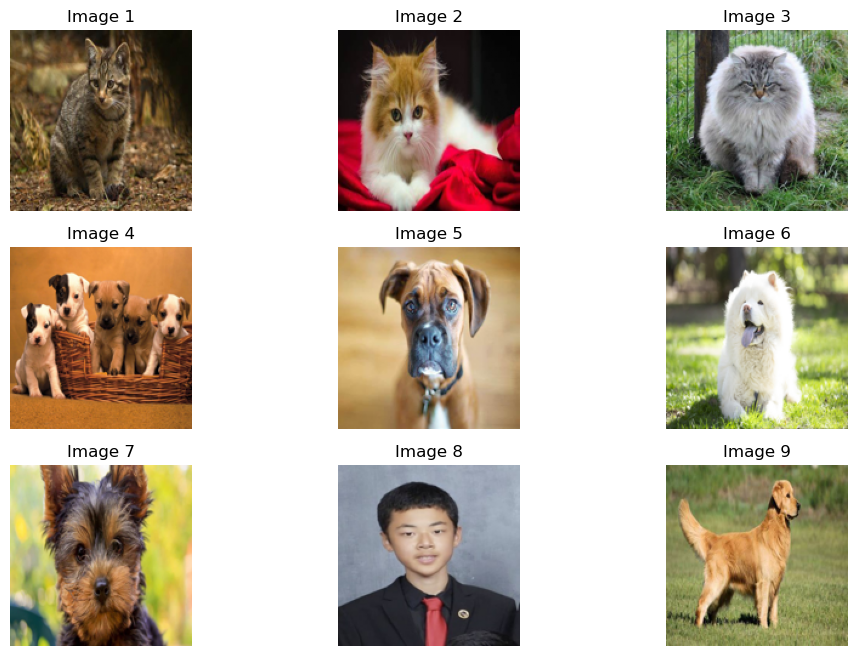

In [39]:
# Display the preprocessed images
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(new_images[i])
    ax.set_title(f"Image {i+1}")
    ax.axis("off")

plt.show()


In [42]:
# Make predictions
predictions = model.predict(new_images)

# If you have binary classification (cats vs. dogs), you can threshold the predictions
threshold = 0.01  # You can adjust this threshold

# Threshold the predictions (0 for cats, 1 for dogs)
binary_predictions = (predictions > threshold).astype(int)

# Print the predictions
print(binary_predictions)

# Print the raw probabilities for reference
print(predictions)

1/1 [==============================] - 0s 62ms/step
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]
[[3.0722974e-06]
 [8.5617666e-11]
 [1.3814248e-02]
 [8.1779547e-02]
 [2.4898970e-01]
 [3.0234423e-03]
 [1.5889858e-04]
 [9.1529632e-01]
 [4.3917635e-01]]


In [47]:
from tensorflow.keras.models import load_model

new_model = load_model('my_model.keras')